In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier

# Подготовка данных

In [18]:
dataset_path = 'data/creditcard.csv'
dataset = pd.read_csv(dataset_path, sep='[,]', engine='python')

In [19]:
df = dataset.copy()
display(df)

,"""Time""","""V1""","""V2""","""V3""","""V4""","""V5""","""V6""","""V7""","""V8""","""V9""",...,"""V21""","""V22""","""V23""","""V24""","""V25""","""V26""","""V27""","""V28""","""Amount""","""Class"""
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,"""0"""
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,"""0"""
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,"""0"""
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,"""0"""
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,"""0"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,"""0"""
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,"""0"""
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,"""0"""
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,"""0"""


In [20]:
df.columns = df.columns.str.replace(r'\W', '', regex=True)
df.loc[:, 'Class'] = df.loc[:, 'Class'].str.replace(r'\W', '', regex=True)
df = df.astype({'Class': 'int'})
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Балансировка датасета
Соотношение значений Class исходного датасета

[Text(0, 0, '492')]

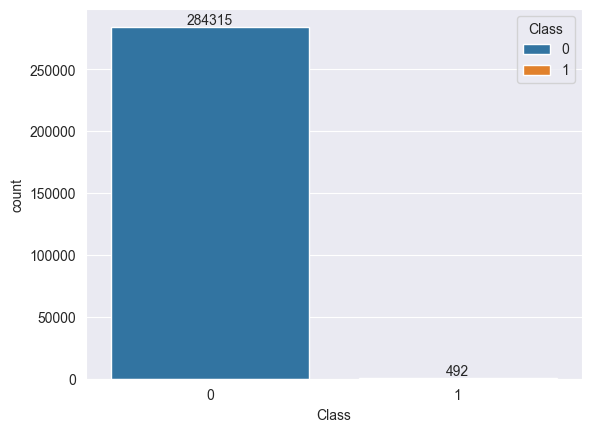

In [21]:
ax = sns.countplot(x='Class', data=df, hue='Class')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

Разделим данные

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.25, random_state=0)

Применим Random Undersampling для класса большинства

In [23]:
rus = RandomUnderSampler(random_state=0, sampling_strategy='not minority')
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [24]:
ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

##### Используем CatBoosting в качестве первичной модели

In [25]:
# AUC
params = {'iterations': 1000, 'use_best_model': True, 'eval_metric': 'AUC'}
model = CatBoostClassifier(**params)

model.fit(X_train_resampled, y_train_resampled,
          eval_set=(X_test_resampled, y_test_resampled),
          verbose=50)

Learning rate set to 0.029457
0:	test: 0.9245329	best: 0.9245329 (0)	total: 8.27ms	remaining: 8.26s
50:	test: 0.9787008	best: 0.9787008 (50)	total: 319ms	remaining: 5.94s
100:	test: 0.9802893	best: 0.9802893 (100)	total: 598ms	remaining: 5.32s
150:	test: 0.9813213	best: 0.9813213 (150)	total: 884ms	remaining: 4.97s
200:	test: 0.9822800	best: 0.9825091 (196)	total: 1.17s	remaining: 4.64s
250:	test: 0.9823832	best: 0.9825758 (235)	total: 1.45s	remaining: 4.34s
300:	test: 0.9823601	best: 0.9825758 (235)	total: 1.74s	remaining: 4.04s
350:	test: 0.9823354	best: 0.9825758 (235)	total: 2.02s	remaining: 3.74s
400:	test: 0.9824457	best: 0.9825758 (235)	total: 2.34s	remaining: 3.5s
450:	test: 0.9823911	best: 0.9825758 (235)	total: 2.64s	remaining: 3.21s
500:	test: 0.9822900	best: 0.9825758 (235)	total: 2.92s	remaining: 2.91s
550:	test: 0.9817200	best: 0.9825758 (235)	total: 3.23s	remaining: 2.63s
600:	test: 0.9815894	best: 0.9825758 (235)	total: 3.58s	remaining: 2.38s
650:	test: 0.9813087	best: 

In [26]:
# Recall
params = {'iterations': 1000, 'use_best_model': True, 'eval_metric': 'Recall'}
model = CatBoostClassifier(**params)

model.fit(X_train_resampled, y_train_resampled,
          eval_set=(X_test_resampled, y_test_resampled),
          verbose=50)

Learning rate set to 0.029457
0:	learn: 0.8844086	test: 0.8538589	best: 0.8538589 (0)	total: 4.03ms	remaining: 4.03s
50:	learn: 0.9354839	test: 0.8941926	best: 0.8941926 (22)	total: 127ms	remaining: 2.37s
100:	learn: 0.9650538	test: 0.8852311	best: 0.8941926 (22)	total: 282ms	remaining: 2.51s
150:	learn: 0.9865591	test: 0.8852311	best: 0.8941926 (22)	total: 407ms	remaining: 2.29s
200:	learn: 0.9946237	test: 0.8941926	best: 0.9021975 (184)	total: 582ms	remaining: 2.31s
250:	learn: 0.9973118	test: 0.9021975	best: 0.9021975 (184)	total: 706ms	remaining: 2.1s
300:	learn: 1.0000000	test: 0.9021975	best: 0.9021975 (184)	total: 830ms	remaining: 1.93s
350:	learn: 1.0000000	test: 0.8932360	best: 0.9021975 (184)	total: 953ms	remaining: 1.76s
400:	learn: 1.0000000	test: 0.8932360	best: 0.9021975 (184)	total: 1.08s	remaining: 1.61s
450:	learn: 1.0000000	test: 0.8932360	best: 0.9021975 (184)	total: 1.2s	remaining: 1.46s
500:	learn: 1.0000000	test: 0.9012127	best: 0.9021975 (184)	total: 1.32s	remain

In [27]:
# Precision
params = {'iterations': 1000, 'use_best_model': True, 'eval_metric': 'Precision'}
model = CatBoostClassifier(**params)

model.fit(X_train_resampled, y_train_resampled,
          eval_set=(X_test_resampled, y_test_resampled),
          verbose=50)

Learning rate set to 0.029457
0:	learn: 0.9879880	test: 0.9614434	best: 0.9614434 (0)	total: 4.19ms	remaining: 4.19s
50:	learn: 0.9971347	test: 0.9786445	best: 0.9790515 (44)	total: 129ms	remaining: 2.41s
100:	learn: 1.0000000	test: 0.9797126	best: 0.9806678 (84)	total: 257ms	remaining: 2.29s
150:	learn: 1.0000000	test: 0.9783264	best: 0.9806678 (84)	total: 380ms	remaining: 2.13s
200:	learn: 1.0000000	test: 0.9770498	best: 0.9806678 (84)	total: 505ms	remaining: 2.01s
250:	learn: 1.0000000	test: 0.9759698	best: 0.9806678 (84)	total: 629ms	remaining: 1.88s
300:	learn: 1.0000000	test: 0.9754354	best: 0.9806678 (84)	total: 779ms	remaining: 1.81s
350:	learn: 1.0000000	test: 0.9743720	best: 0.9806678 (84)	total: 933ms	remaining: 1.73s
400:	learn: 1.0000000	test: 0.9738190	best: 0.9806678 (84)	total: 1.06s	remaining: 1.58s
450:	learn: 1.0000000	test: 0.9733115	best: 0.9806678 (84)	total: 1.18s	remaining: 1.44s
500:	learn: 1.0000000	test: 0.9726841	best: 0.9806678 (84)	total: 1.3s	remaining: 1

In [28]:
# Accuracy
params = {'iterations': 1000, 'use_best_model': True, 'eval_metric': 'Accuracy'}
model = CatBoostClassifier(**params)

model.fit(X_train_resampled, y_train_resampled,
          eval_set=(X_test_resampled, y_test_resampled),
          verbose=50)

Learning rate set to 0.029457
0:	learn: 0.9368280	test: 0.9098084	best: 0.9098084 (0)	total: 3.83ms	remaining: 3.83s
50:	learn: 0.9663978	test: 0.9373400	best: 0.9375299 (44)	total: 131ms	remaining: 2.43s
100:	learn: 0.9825269	test: 0.9334501	best: 0.9382825 (84)	total: 261ms	remaining: 2.33s
150:	learn: 0.9932796	test: 0.9328100	best: 0.9382825 (84)	total: 385ms	remaining: 2.16s
200:	learn: 0.9973118	test: 0.9365944	best: 0.9409063 (186)	total: 510ms	remaining: 2.03s
250:	learn: 0.9986559	test: 0.9399918	best: 0.9409063 (186)	total: 633ms	remaining: 1.89s
300:	learn: 1.0000000	test: 0.9397386	best: 0.9409063 (186)	total: 758ms	remaining: 1.76s
350:	learn: 1.0000000	test: 0.9348710	best: 0.9409063 (186)	total: 882ms	remaining: 1.63s
400:	learn: 1.0000000	test: 0.9346107	best: 0.9409063 (186)	total: 1.01s	remaining: 1.51s
450:	learn: 1.0000000	test: 0.9343716	best: 0.9409063 (186)	total: 1.13s	remaining: 1.38s
500:	learn: 1.0000000	test: 0.9379519	best: 0.9409063 (186)	total: 1.25s	rema

In [29]:
cat_pred = model.predict(X_test_resampled)
print(metrics.classification_report(y_test_resampled, cat_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     71082
           1       0.98      0.90      0.94     71082

    accuracy                           0.94    142164
   macro avg       0.94      0.94      0.94    142164
weighted avg       0.94      0.94      0.94    142164


Построим гистограмму значимости фичей датасета по метрике точности

<Axes: ylabel='features'>

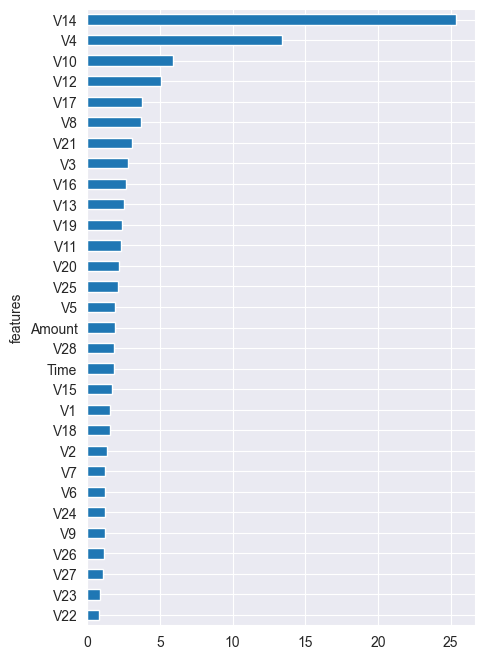

In [30]:
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
                 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
fi = pd.DataFrame({'features': feature_names, 'w': model.feature_importances_})
fi.sort_values('w', inplace=True)
fi.set_index('features')['w'].plot(kind='barh', figsize=(5, 8), grid=True)

In [31]:
print(f'Количество нулей: {np.sum(cat_pred == 0)}\n'
      f'Количество единиц: {np.sum(cat_pred == 1)}\n'
      f'Матрица ошибок:')
metrics.confusion_matrix(y_test_resampled, cat_pred)

Количество нулей: 76585
Количество единиц: 65579
Матрица ошибок:


array([[69633,  1449],
       [ 6952, 64130]], dtype=int64)

Соотношение значений Class сбалансированного датасета

[Text(0, 0, '65579')]

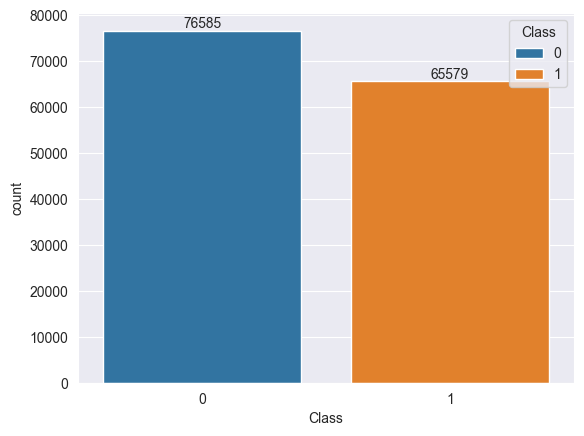

In [32]:
df_cat_pred = pd.DataFrame(cat_pred, columns=['Class'])
ax = sns.countplot(x='Class', data=df_cat_pred, hue='Class')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Прямой отбор фичей